<font color="#399DA6"><h1>Testing a music</h1></font>

Importing all the required libraries:

    "Load_data": extracts all the features from dataset
    
    "LDA": Linear Discriminant Analysis library

In [6]:
import sys
import numpy as np
import pandas as pd
sys.path.insert(0, '../Libraries')
sys.path.insert(0, '../Datas/')

from Load_data import *
from LDA import *
from PCA import *

Using *loaddata()*, all the features from dataset are extracted and stored in a data frame.

Then features and labels are divided.

In [7]:
dataset='591'
df=loaddata(features=["chroma_cqt","melspectrogram"], adr1=f'../Datas/X_{dataset}.pickle',adr2=f'../Datas/label_instrument_{dataset}.pickle',adr3=f'../Datas/label_dastgah_{dataset}.pickle')
df = df.sample(frac=1,random_state=0).reset_index(drop=True)
feature_vectors=df.drop(["dastgah","instrument"],axis=1)
Label="dastgah"
y=df[Label]
PCAin=False
LDAin=True

n=-1

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(feature_vectors,y,test_size=0.2,random_state=0)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [9]:
clf = KNeighborsClassifier(n_neighbors = 1).fit(X_train,y_train.values.ravel())
yhat = clf.predict(X_test)
acc=metrics.accuracy_score(y_test.values.ravel(), yhat)
print(acc)

0.2589928057553957


In [10]:

df_train=pd.DataFrame(X_train,columns=feature_vectors.columns)
df_train[Label]=y_train

df_train=df_train[df_train["dastgah"]!=n]


In [11]:

X_train=df_train.drop([Label],axis=1)
y_train=df_train[Label]

In [12]:
from preprocess import *
X_train,X_test = preprocess(X_train,X_test)


Utilizing the LDA library, feature conditioning is done and only the selected features are stored in *feature_vectors* data frame.

In [13]:
if(PCAin):
    Pca=pca(X_train)
    X_train=Pca.PCAout(50)
    X_test=Pca.PCA_changeX(X_test)

The selected features are shown:

Classifiers KNN, SVM, MLP, Logistic, Adaboost, and XGBoost are used

<font color="#61C29E"><h1>1) KNN</h2></font>
After classification, accuracy and confusion matrix are reported.

In [14]:
Accuracies = [["KNN",0], ["SVM",0], ["MLP",0], ["Logistic",0], ["Adaboost",0], ["XGBoost",0]]

The best accuracy is 30.99 % with k = 2
Cross-Validation Results:  [0.3063063063063063, 0.32432432432432434, 0.3153153153153153, 0.26126126126126126, 0.34234234234234234]
min validation accuracy is 26.13 % with k = 2
mean validation accuracy is 30.99 % with k = 2
max validation accuracy is 34.23 % with k = 2


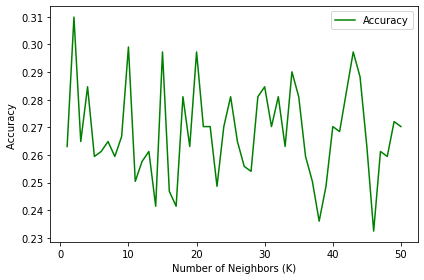

====> Test accuracy is 30.22 % with k = 2


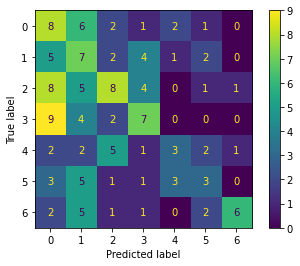

In [15]:
from KNN import *
L=-1
Knn=KNN(X_train,y_train,X_test,y_test)
K=Knn.plot(50,LDAin,L)
# Knn.accurate(K,X_test,y_test,LDAin=LDAin)
Accuracies[0][1] = Knn.acc

<font color="#61C29E"><h1>2) SVM</h2></font>
After classification, accuracy and confusion matrix are reported.

Cross-Validation Results:  [0.24324324324324326, 0.24324324324324326, 0.38738738738738737, 0.2882882882882883, 0.22522522522522523]
min validation accuracy is 22.52
mean validation accuracy is 27.75
max validation accuracy is 38.74
====> Test accuracy is 28.78


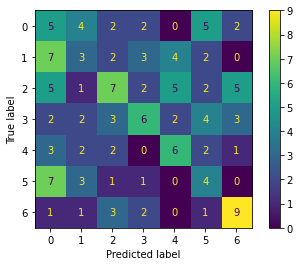

              precision    recall  f1-score   support

         0.0       0.17      0.25      0.20        20
         1.0       0.19      0.14      0.16        21
         2.0       0.35      0.26      0.30        27
         3.0       0.38      0.27      0.32        22
         4.0       0.35      0.38      0.36        16
         5.0       0.20      0.25      0.22        16
         6.0       0.45      0.53      0.49        17

    accuracy                           0.29       139
   macro avg       0.30      0.30      0.29       139
weighted avg       0.30      0.29      0.29       139



In [16]:
from SVM import *
svm=SVM(X_train,y_train,X_test,y_test)
svm.accurate(LDAin=LDAin)
Accuracies[1][1] = svm.acc

<font color="#61C29E"><h1>3) MLP</h2></font>
After classification, accuracy and confusion matrix are reported.

Cross-Validation Results:  [0.26126126126126126, 0.2702702702702703, 0.2882882882882883, 0.26126126126126126, 0.22522522522522523]
min validation accuracy is 22.52
mean validation accuracy is 26.13
max validation accuracy is 28.83
====> Test accuracy is 38.85


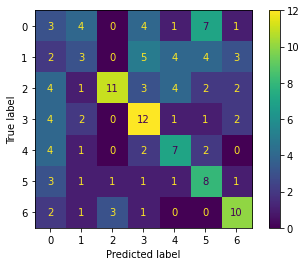

              precision    recall  f1-score   support

         0.0       0.14      0.15      0.14        20
         1.0       0.23      0.14      0.18        21
         2.0       0.73      0.41      0.52        27
         3.0       0.43      0.55      0.48        22
         4.0       0.39      0.44      0.41        16
         5.0       0.33      0.50      0.40        16
         6.0       0.53      0.59      0.56        17

    accuracy                           0.39       139
   macro avg       0.40      0.40      0.38       139
weighted avg       0.41      0.39      0.39       139



In [17]:
from mlp import *
mlp=MLP(X_train,y_train,X_test,y_test)
mlp.accurate(LDAin=LDAin)
Accuracies[2][1] = mlp.acc

<font color="#61C29E"><h1>4) Logistic</h2></font>
After classification, accuracy and confusion matrix are reported.

Cross-Validation Results:  [0.27927927927927926, 0.25225225225225223, 0.26126126126126126, 0.25225225225225223, 0.34234234234234234]
min validation accuracy is 25.23
mean validation accuracy is 27.75
max validation accuracy is 34.23
====> Test accuracy is 25.9


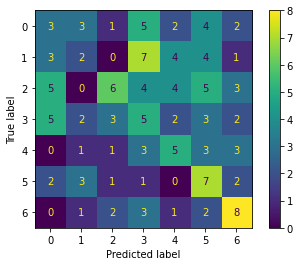

              precision    recall  f1-score   support

         0.0       0.17      0.15      0.16        20
         1.0       0.17      0.10      0.12        21
         2.0       0.43      0.22      0.29        27
         3.0       0.18      0.23      0.20        22
         4.0       0.28      0.31      0.29        16
         5.0       0.25      0.44      0.32        16
         6.0       0.38      0.47      0.42        17

    accuracy                           0.26       139
   macro avg       0.26      0.27      0.26       139
weighted avg       0.27      0.26      0.25       139



In [18]:
from LogisticRegression import *
lr=LR(X_train,y_train,X_test,y_test)
lr.accurate(LDAin=LDAin)
Accuracies[3][1] = lr.acc

<font color="#61C29E"><h1>5) AdaBoost</h2></font>
After classification, accuracy and confusion matrix are reported.

Cross-Validation Results:  [0.21621621621621623, 0.27927927927927926, 0.27927927927927926, 0.24324324324324326, 0.22522522522522523]
min validation accuracy is 21.62
mean validation accuracy is 24.86
max validation accuracy is 27.93
====> Test accuracy is 17.99


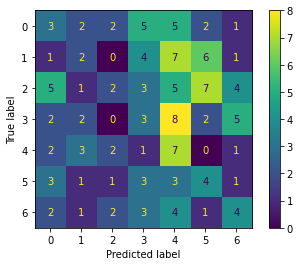

              precision    recall  f1-score   support

         0.0       0.17      0.15      0.16        20
         1.0       0.17      0.10      0.12        21
         2.0       0.22      0.07      0.11        27
         3.0       0.14      0.14      0.14        22
         4.0       0.18      0.44      0.25        16
         5.0       0.18      0.25      0.21        16
         6.0       0.24      0.24      0.24        17

    accuracy                           0.18       139
   macro avg       0.18      0.20      0.18       139
weighted avg       0.18      0.18      0.17       139



In [19]:
from adaboost import *
adaboost=ADABOOST(X_train,y_train,X_test,y_test)
adaboost.accurate(LDAin=LDAin)
Accuracies[4][1] = adaboost.acc

<font color="#61C29E"><h1>6) XGBoost</h2></font>
After classification, accuracy and confusion matrix are reported.

Cross-Validation Results:  [0.24324324324324326, 0.27927927927927926, 0.1891891891891892, 0.2072072072072072, 0.2972972972972973]
min validation accuracy is 18.92
mean validation accuracy is 24.32
max validation accuracy is 29.73
====> Test accuracy is 37.41


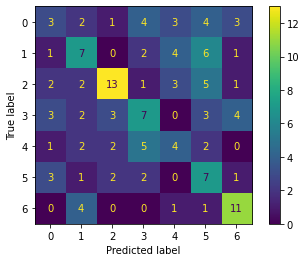

              precision    recall  f1-score   support

         0.0       0.23      0.15      0.18        20
         1.0       0.35      0.33      0.34        21
         2.0       0.62      0.48      0.54        27
         3.0       0.33      0.32      0.33        22
         4.0       0.27      0.25      0.26        16
         5.0       0.25      0.44      0.32        16
         6.0       0.52      0.65      0.58        17

    accuracy                           0.37       139
   macro avg       0.37      0.37      0.36       139
weighted avg       0.38      0.37      0.37       139



In [20]:
from XGBoost import *
xgboost=XGBoost(X_train,y_train,X_test,y_test)
xgboost.acc=0
xgboost.yhat=[-1 for i in range(len(y_train))]
try:
    xgboost.accurate(LDAin=LDAin)
except:
    pass
Accuracies[5][1] = xgboost.acc

In [21]:
temp = np.zeros((6,1))
for i in range(6):
    temp[i] = Accuracies[i][1]
for j in range(6):
    if Accuracies[j][1] == np.max(temp):
        print(Accuracies[j])

['MLP', 0.38848920863309355]


In [22]:
Accuracies

[['KNN', 0.302158273381295],
 ['SVM', 0.28776978417266186],
 ['MLP', 0.38848920863309355],
 ['Logistic', 0.2589928057553957],
 ['Adaboost', 0.17985611510791366],
 ['XGBoost', 0.37410071942446044]]

In [23]:
yt0=[list(Knn.yhat),list(svm.yhat),list(mlp.yhat),list(lr.yhat),list(adaboost.yhat),list(xgboost.yhat)]
ymod=[]
for i in range(len(list(Knn.yhat))):
    lst=[yt0[k][i] for k in range(len(yt0))]
    ymod.append(max(lst,key=lst.count))

In [24]:
from sklearn import metrics

metrics.accuracy_score(y_test.values.ravel(), ymod)

0.37410071942446044

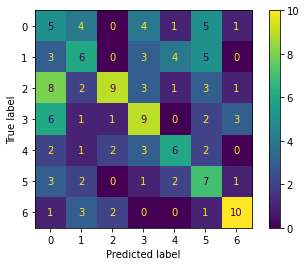

In [25]:
import matplotlib.pyplot as plt
from sklearn import metrics

cm = metrics.confusion_matrix(y_test.values.ravel(), ymod)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()